In [3]:
# read code tools
# share in https://gist.github.com/WuShaogui/19c690bde2a0fe70b061d50e20129531
import sys
import os.path as osp
sys.path.append('/home/wushaogui/ReadCode/')
from my_read_code_tools import *

## 测试

In [4]:
img_path='demo1.png'
img=cv2.imread(img_path,-1)
print(img.shape,img.dtype)
show_images([img])

AttributeError: 'NoneType' object has no attribute 'shape'

In [4]:
# 求每个通道的最大最小
import numpy as np
[(i,np.min(img[...,i]),np.max(img[...,i])) for i in range(4)]

[(0, 0, 255), (1, 0, 255), (2, 0, 255), (3, 255, 255)]

In [5]:
# 去掉最后一个通道
img=img[...,:3]

In [6]:
# 查看RGB组合类型
np.unique(img.reshape(-1, 3), axis=0)

array([[  0,   0,   0],
       [  1,   1,   1],
       [  2,   2,   2],
       [  3,   3,   3],
       [  4,   4,   4],
       [  5,   5,   5],
       [  6,   6,   6],
       [  7,   7,   7],
       [  8,   8,   8],
       [  9,   9,   9],
       [ 10,  10,  10],
       [ 11,  11,  11],
       [ 12,  12,  12],
       [ 13,  13,  13],
       [ 14,  14,  14],
       [ 15,  15,  15],
       [ 16,  16,  16],
       [ 17,  17,  17],
       [ 18,  18,  18],
       [ 19,  19,  19],
       [ 20,  20,  20],
       [ 21,  21,  21],
       [ 22,  22,  22],
       [ 23,  23,  23],
       [ 24,  24,  24],
       [ 25,  25,  25],
       [ 26,  26,  26],
       [ 27,  27,  27],
       [ 28,  28,  28],
       [ 29,  29,  29],
       [ 30,  30,  30],
       [ 31,  31,  31],
       [ 32,  32,  32],
       [ 33,  33,  33],
       [ 34,  34,  34],
       [ 35,  35,  35],
       [ 36,  36,  36],
       [ 37,  37,  37],
       [ 38,  38,  38],
       [ 39,  39,  39],
       [ 40,  40,  40],
       [ 41,  41

In [7]:
# 查看RGB特定的组合位置
pos=[np.where(img==[10,10,10])[i][0] for i in range(len(img.shape)-1)]
pos,img[102,182]

([102, 182], array([10, 10, 10], dtype=uint8))

In [8]:
# 查看每个通道是否相等
np.all(img[...,0]==img[...,1]),np.all(img[...,1]==img[...,2])

(False, False)

In [9]:
# 验证通道不相同的位置
pos=[np.where(img[img[...,0]!=img[...,1]])[i][0] for i in range(len(img.shape)-1)]
pos,img[0,0]

([0, 0], array([255, 252, 250], dtype=uint8))

0 255 123.32367738192426 111.23719638674073


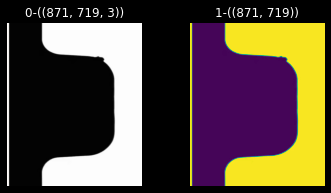

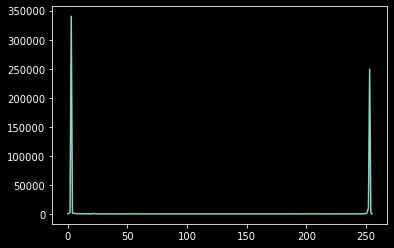

In [10]:
# 先将图片转为灰度图
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
print(np.min(gray),np.max(gray),np.std(gray),np.mean(gray))
show_images([img,gray])
# 查看灰度值分布
histr1 = cv2.calcHist([gray],[0],None,[256],[0,255])
plt.plot([i for i in range(256)],histr1)

0 255 123.32367738192426 143.76280361325925


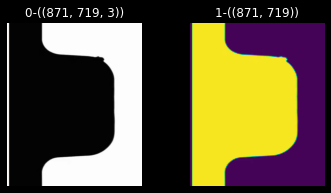

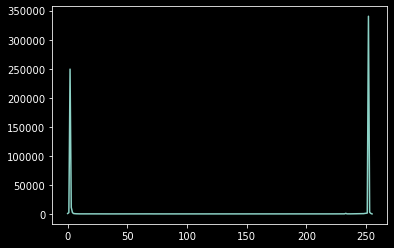

In [11]:
# 目标区域变255，背景变0
gray=255-gray
print(np.min(gray),np.max(gray),np.std(gray),np.mean(gray))
show_images([img,gray])
# 查看灰度值分布
histr1 = cv2.calcHist([gray],[0],None,[256],[0,255])
plt.plot([i for i in range(256)],histr1)

In [12]:
# 去噪声
gray=cv2.bilateralFilter(gray,5,150,150)

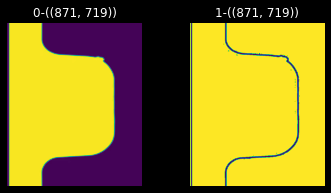

In [13]:
# 二值化
binary=cv2.adaptiveThreshold(gray,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,11,2)
show_images([gray,binary])

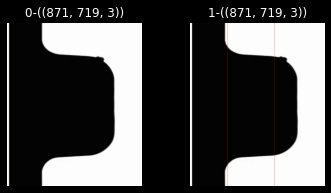

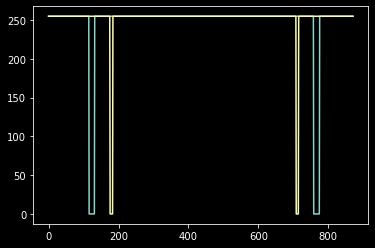

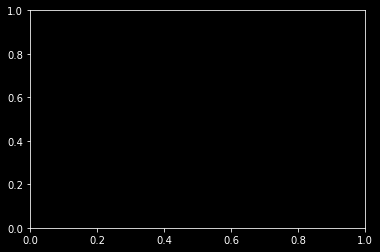

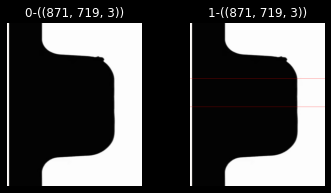

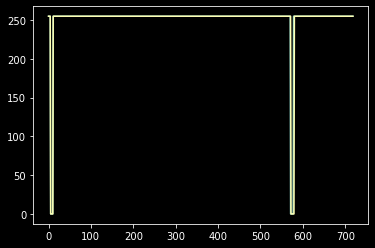

In [14]:
# 横纵向像素值分布
color_img=img.copy()
color_img[:,200,:]=[255,0,0]
color_img[:,450,:]=[255,0,0]
show_images([img,color_img])

show_mat=binary.copy()
plt.plot([i for i in range(show_mat.shape[0])],show_mat[:,200]) # x=200纵向
plt.plot([i for i in range(show_mat.shape[0])],show_mat[:,450]) # x=450纵向
plt.show()

plt.cla()
color_img=img.copy()
color_img[300,:,:]=[255,0,0]
color_img[450,:,:]=[255,0,0]
show_images([img,color_img])
plt.plot([i for i in range(show_mat.shape[1])],show_mat[300,:]) # y=300横向
plt.plot([i for i in range(show_mat.shape[1])],show_mat[450,:]) # y=450横向

### 平滑轮廓

In [15]:
# 寻找轮廓
contours,hierarchy=cv2.findContours(binary,cv2.RETR_CCOMP,cv2.CHAIN_APPROX_SIMPLE)
print(len(contours),contours[1])

29 [[[582 390]]

 [[583 391]]

 [[583 394]]

 [[582 395]]

 [[580 393]]

 [[580 392]]]


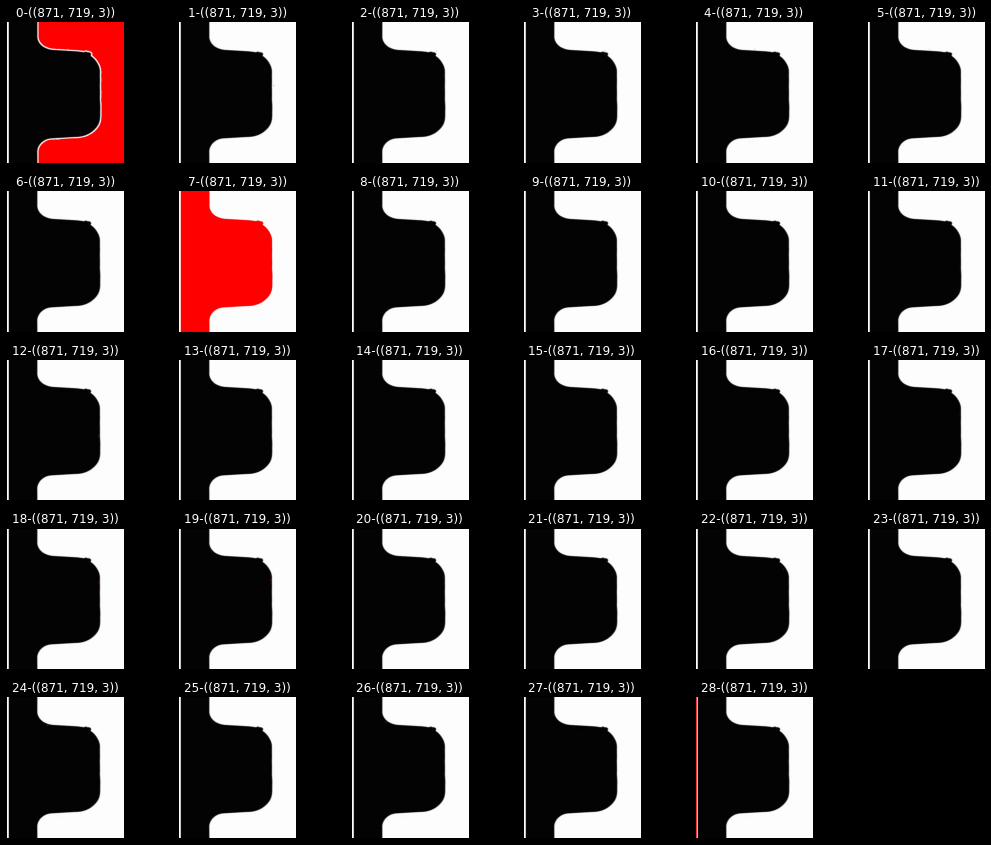

In [16]:
# 显示所有轮廓
allcontours=[]
for idx in range(len(contours)):
    render_img=img.copy()
    render_img=cv2.drawContours(render_img,[contours[idx]],-1,(255,0,0),-1)
    allcontours.append(render_img)
show_images(allcontours)

377


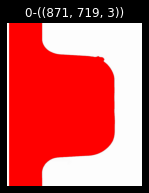

In [18]:
# 查找最大轮廓
contour_erea=[(idx,cv2.contourArea(contours[idx])) for idx in range(len(contours))]
contour_erea=sorted(contour_erea, key=lambda tup: tup[1],reverse=True)

choice_contour_idx=contour_erea[0][0]
print(len(contours[choice_contour_idx]))
render_img1=img.copy()
render_img1=cv2.drawContours(render_img1,[contours[choice_contour_idx]],-1,(255,0,0),-1)
show_images([render_img1])

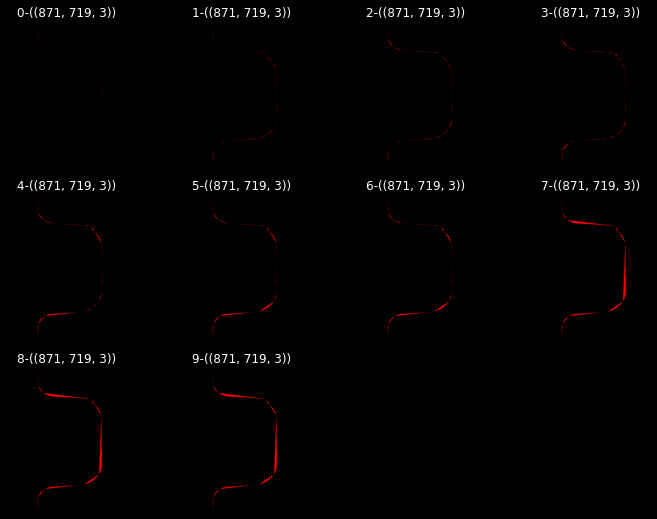

In [19]:
# 轮廓近似-原始轮廓->无法拿出异常区域
all_result=[]
for idx in range(1,21,2):
    copy_contour=contours[choice_contour_idx].copy()
    copy_contour=copy_contour.reshape((-1,copy_contour.shape[1],copy_contour.shape[-1])) #去掉矩阵中间维度1
    copy_contour=cv2.approxPolyDP(copy_contour,idx,True) #使用approxPolyDP求得近似多边形的点集合
    copy_contour=copy_contour.reshape((copy_contour.shape[0],1,copy_contour.shape[2]))
    # print(contours[choice_contour_idx].shape,copy_contour.shape)

    render_img2=img.copy()
    render_img2=cv2.drawContours(render_img2,[copy_contour],-1,(255,0,0),-1)
    del_region=render_img1-render_img2
    pad_pos=np.logical_or(np.logical_or(del_region[...,0]>0,del_region[...,1]>0),del_region[...,2]>0)
    del_region[...,0]=np.where(pad_pos,255,del_region[...,0])
    del_region[...,1]=np.where(pad_pos,0,del_region[...,1])
    del_region[...,2]=np.where(pad_pos,0,del_region[...,2])
    # all_result.append(np.hstack(np.array([render_img1,render_img2,del_region])))
    all_result.append(del_region)
show_images(all_result)

### 形态学

(871, 719) uint8


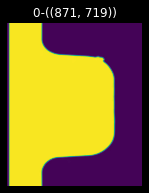

In [101]:
print(gray.shape,gray.dtype)
show_images([gray])

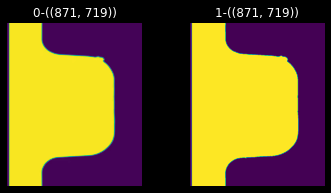

In [16]:
_,binary=cv2.threshold(gray,8,255,cv2.THRESH_BINARY)
show_images([gray,binary])

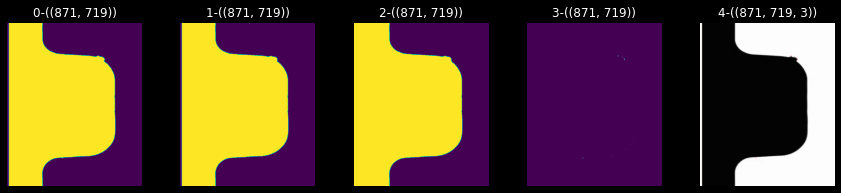

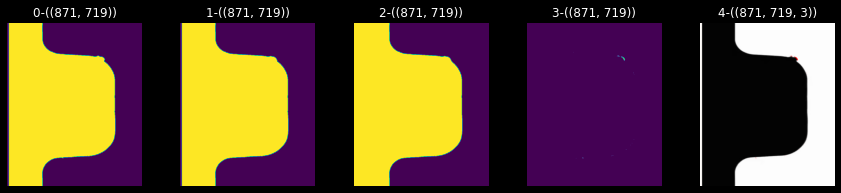

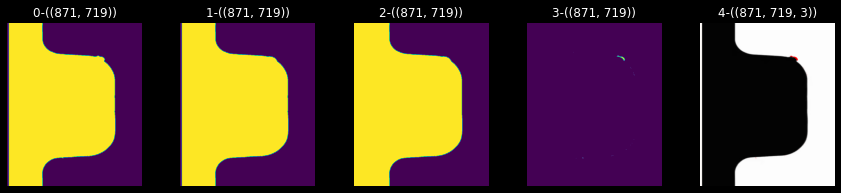

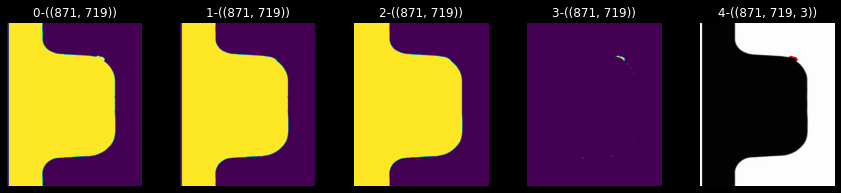

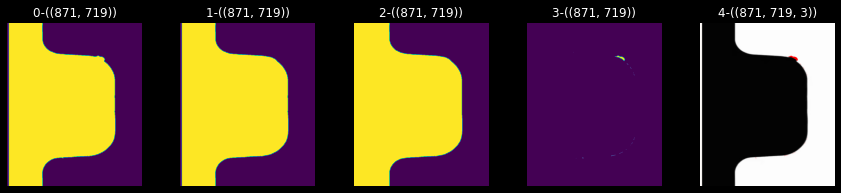

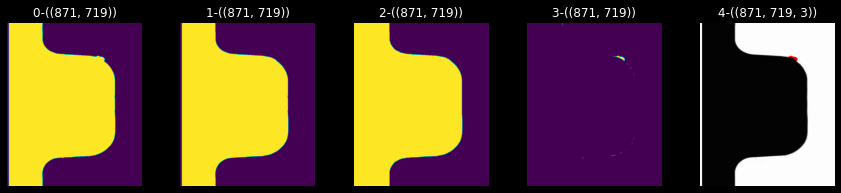

In [29]:
# 开闭操作->无法稳定扣出异常区域
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(29,29))
for it in range(1,7):
    opening = cv2.morphologyEx(binary,cv2.MORPH_OPEN,kernel, iterations =it)
    closeing = cv2.morphologyEx(opening,cv2.MORPH_CLOSE,kernel, iterations =it)
    

    del_region=binary-opening
    del_region[del_region>0]=255

    copy_img=img.copy()
    copy_img[del_region>0]=[255,0,0]

    show_images([binary,opening,closeing,del_region,copy_img],1)
    cv2.imwrite('result-%s.png'%it,copy_img)

### 霍夫圆变换

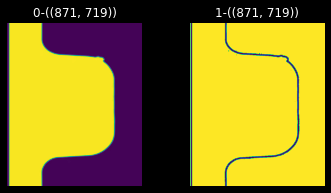

In [103]:
# 二值化
binary=cv2.adaptiveThreshold(gray,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,11,2)
show_images([gray,binary])

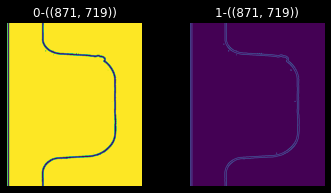

In [126]:
edges = cv2.Canny(binary, 50, 150)
show_images([binary,edges])

In [130]:
circles = cv2.HoughCircles(edges, cv2.HOUGH_GRADIENT, 1, 200, param1=100, param2=30, minRadius=60, maxRadius=90)
print(len(circles))

TypeError: object of type 'NoneType' has no len()

In [131]:
lines = cv2.HoughLinesP(edges, 0.8, np.pi/180, 90, minLineLength=50, maxLineGap=10)
print(len(lines))

9


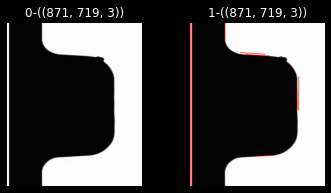

In [133]:
# 画出直线
copy_img=img.copy()
for line in lines:
    x1,y1,x2,y2 = line[0]
    cv2.line(copy_img, (x1,y1), (x2,y2), (255, 0, 0), 2, lineType=cv2.LINE_AA)
show_images([img,copy_img])

In [142]:
# 霍夫直线变换
lines = cv2.HoughLines(edges, 0.8, np.pi/180, 90)
print(len(lines))

20


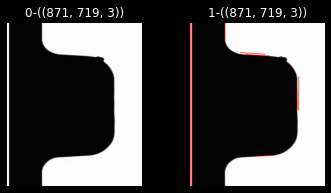

True

In [153]:
# 画出直线
copy_img1=img.copy()
# 将检测的线画出来（极坐标）
for i in range(len(lines)):
    line=lines[i]
    rho, theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a * rho
    y0 = b * rho

    # 由参数空间向实际坐标点转换
    x1 = int(x0 + 1000 * (-b))
    y1 = int(y0 + 1000 * (a))
    x2 = int(x0 - 1000 * (-b))
    y2 = int(y0 - 1000 * (a))

    cv2.line(copy_img1, (x1, y1), (x2, y2), (0, 0, 255))
    cv2.putText(copy_img1,str(i),(x1-5, y1-5),cv2.FONT_HERSHEY_SIMPLEX,2,(0,0,255))
show_images([img,copy_img])
cv2.imwrite('copy.png',copy_img)

### 梯度

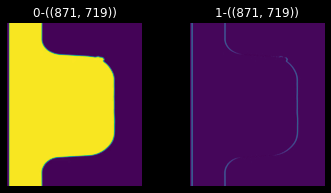

In [96]:
img_gradient_X_64F=cv2.Sobel(gray,cv2.CV_64F,1, 0, 3, 1, 1,cv2.BORDER_DEFAULT)
img_gradient_X_64Fto8U=cv2.convertScaleAbs(img_gradient_X_64F)
show_images([gray,img_gradient_X_64Fto8U])

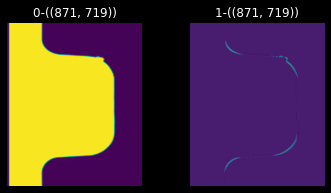

In [97]:
img_gradient_Y_64F=cv2.Sobel(img_gradient_X_64Fto8U,cv2.CV_64F,0, 1, 3, 1, 1,cv2.BORDER_DEFAULT)
img_gradient_Y_64Fto8U=cv2.convertScaleAbs(img_gradient_Y_64F)
show_images([gray,img_gradient_Y_64Fto8U])

In [192]:
lines = cv2.HoughLinesP(img_gradient_Y_64Fto8U, 0.8, np.pi/180, 90, minLineLength=300, maxLineGap=10)
print(len(lines))

876


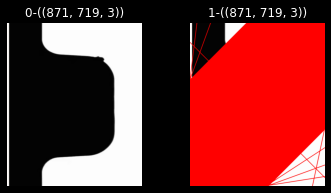

In [193]:
# 画出直线
copy_img=img.copy()
for line in lines:
    x1,y1,x2,y2 = line[0]
    cv2.line(copy_img, (x1,y1), (x2,y2), (255, 0, 0), 2, lineType=cv2.LINE_AA)
show_images([img,copy_img])

### 线性拟合

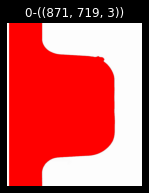

In [154]:
choice_contour_idx=contour_erea[0][0]
render_img1=img.copy()
render_img1=cv2.drawContours(render_img1,[contours[choice_contour_idx]],-1,(255,0,0),-1)
show_images([render_img1])

(377, 1, 2) (48, 1, 2)


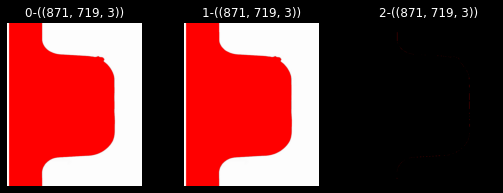

In [20]:
copy_contour=contours[choice_contour_idx].copy()
copy_contour=copy_contour.reshape((-1,copy_contour.shape[1],copy_contour.shape[-1])) #去掉矩阵中间维度1
copy_contour=cv2.approxPolyDP(copy_contour,1,True) #使用approxPolyDP求得近似多边形的点集合
copy_contour=copy_contour.reshape((copy_contour.shape[0],1,copy_contour.shape[2]))
print(contours[choice_contour_idx].shape,copy_contour.shape)

render_img2=img.copy()
render_img2=cv2.drawContours(render_img2,[copy_contour],-1,(255,0,0),-1)
del_region=render_img1-render_img2
pad_pos=np.logical_or(np.logical_or(del_region[...,0]>0,del_region[...,1]>0),del_region[...,2]>0)
del_region[...,0]=np.where(pad_pos,255,del_region[...,0])
del_region[...,1]=np.where(pad_pos,0,del_region[...,1])
del_region[...,2]=np.where(pad_pos,0,del_region[...,2])
show_images([render_img1,render_img2,del_region],1)

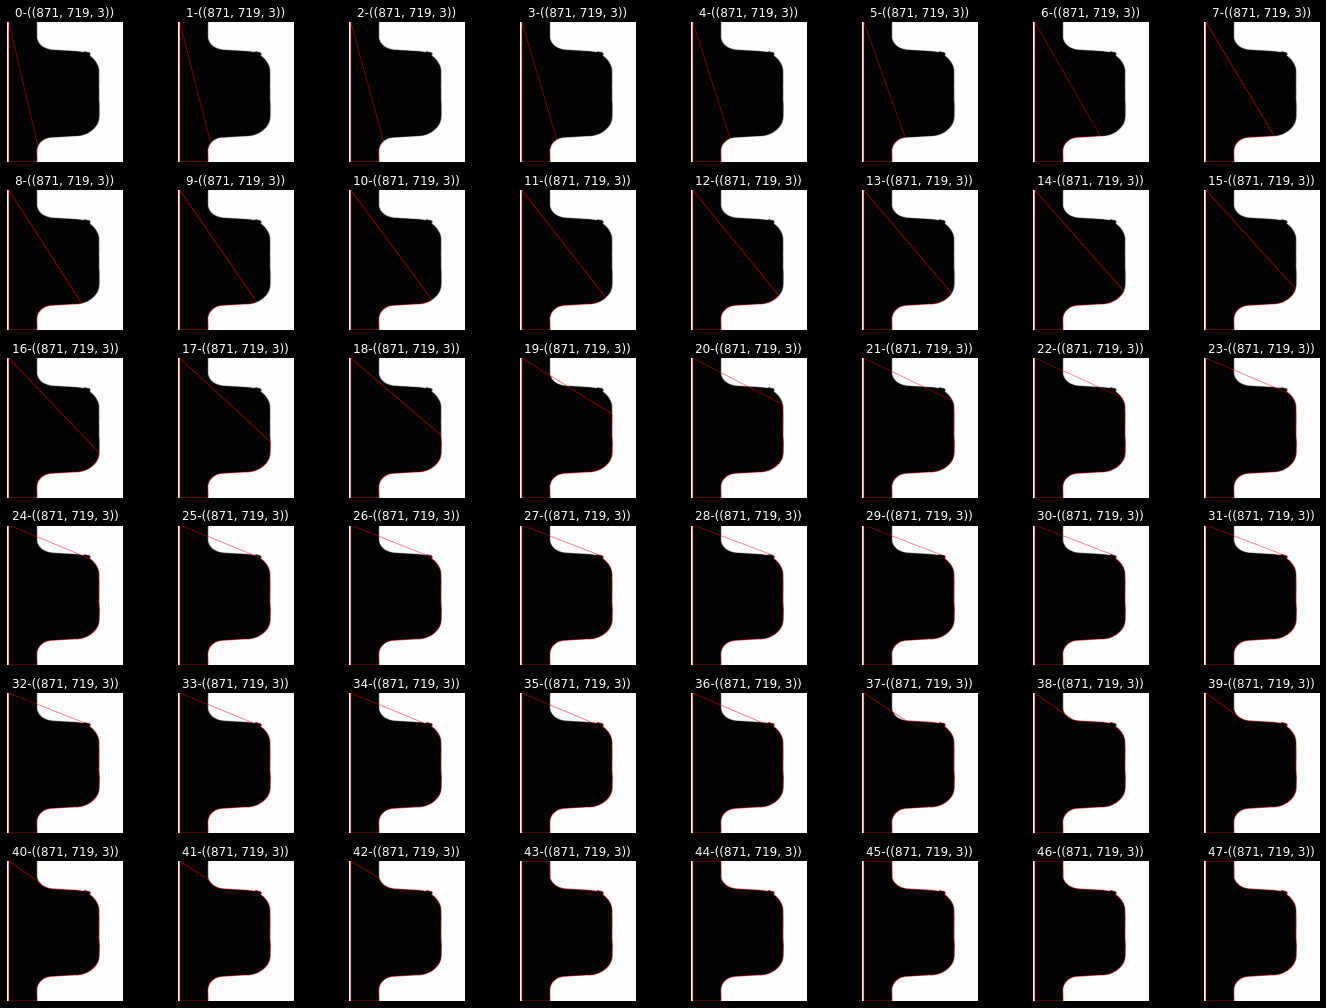

In [21]:
# 逐段绘制轮廓
contour_imgs=[]
gap=5
for iran in range(0,len(copy_contour)):
    render_img3=img.copy()
    draw_contour=copy_contour[0:min(iran+gap,len(copy_contour))]
    # print(draw_contour.flatten())
    render_img3=cv2.drawContours(render_img3,[draw_contour],-1,(255,0,0),2)
    contour_imgs.append(render_img3)
show_images(contour_imgs)

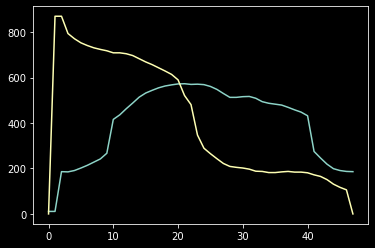

In [22]:
plt.plot([[i,i] for i in range(len(copy_contour))],copy_contour.reshape(copy_contour.shape[0],-1))

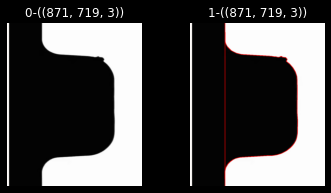

In [23]:
render_img3=img.copy()
my_contour=copy_contour[2:,:]
# print(draw_contour.flatten())
render_img3=cv2.drawContours(render_img3,[my_contour],-1,(255,0,0),2)
show_images([img,render_img3])

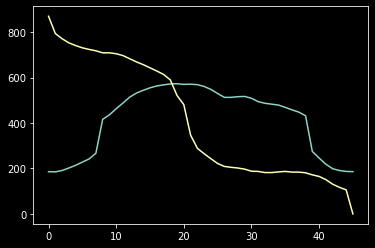

In [24]:
plt.plot([[i,i] for i in range(len(my_contour))],my_contour.reshape(my_contour.shape[0],-1))

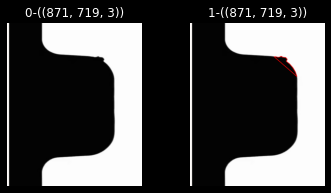

array([[569, 289],
       [561, 265],
       [548, 243],
       [530, 222],
       [513, 209],
       [513, 205],
       [516, 202],
       [517, 197],
       [509, 188],
       [494, 187],
       [487, 182],
       [483, 182],
       [479, 185],
       [469, 187],
       [458, 184],
       [448, 184]], dtype=int32)

In [33]:
render_img3=img.copy()
draw_contour=copy_contour[24:40]
# print(draw_contour.flatten())
render_img3=cv2.drawContours(render_img3,[draw_contour],-1,(255,0,0),2)
show_images([img,render_img3])
copy_contour.reshape(copy_contour.shape[0],-1)[24:40,:]

In [48]:
choice_contour=copy_contour.reshape(copy_contour.shape[0],-1)[25:43]
# choice_contour=contours[choice_contour_idx].reshape(contours[choice_contour_idx].shape[0],-1)
[print(i,choice_contour[i]) for i in range(len(choice_contour))]

0 [561 265]
1 [548 243]
2 [530 222]
3 [513 209]
4 [513 205]
5 [516 202]
6 [517 197]
7 [509 188]
8 [494 187]
9 [487 182]
10 [483 182]
11 [479 185]
12 [469 187]
13 [458 184]
14 [448 184]
15 [432 181]
16 [275 172]
17 [246 165]


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

           3           2
2.072e-05 x - 0.02399 x + 9.05 x - 924.4


/home/wushaogui/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


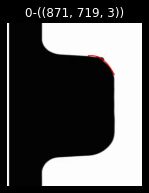

True

In [49]:
# 多项式曲线生成
poly = np.poly1d(np.polyfit(choice_contour[:,0], choice_contour[:,1], 3))
print(poly)

# 绘制拟合曲线
render_img4=img.copy()
for t in range(433, 572, 1):
    y_ = np.int(poly(t))
    cv2.circle(render_img4, (t, y_), 1, (255, 0, 0), 2, 8, 0)
show_images([render_img4])
cv2.imwrite('render_img4.png',render_img4)

           3           2
1.401e-05 x - 0.01531 x + 5.47 x - 462.8


/home/wushaogui/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  # Remove the CWD from sys.path while we load stuff.


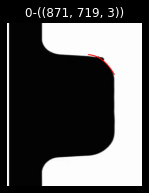

True

In [265]:
# 多项式曲线生成
xmin=220
xmax=360
poly = np.poly1d(np.polyfit(choice_contour[xmin:xmax,0], choice_contour[xmin:xmax,1], 3))
print(poly)

# 绘制拟合曲线
render_img4=img.copy()
for t in range(433, 572, 1):
    y_ = np.int(poly(t))
    cv2.circle(render_img4, (t, y_), 1, (255, 0, 0), 2, 8, 0)
show_images([render_img4])
cv2.imwrite('render_img4.png',render_img4)

#### 求取异常点

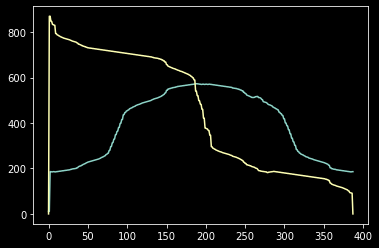

In [269]:
choice_contour=contours[choice_contour_idx]
plt.plot([[i,i] for i in range(len(choice_contour))],choice_contour.reshape(choice_contour.shape[0],-1))

In [60]:
choice_contour=contours[choice_contour_idx]
copy_contour=choice_contour.copy()
copy_contour=copy_contour.reshape((-1,copy_contour.shape[1],copy_contour.shape[-1])) #去掉矩阵中间维度1
copy_contour=cv2.approxPolyDP(copy_contour,1,True) #使用approxPolyDP求得近似多边形的点集合
copy_contour=copy_contour.reshape((copy_contour.shape[0],1,copy_contour.shape[2]))
print(choice_contour.shape,copy_contour.shape)

(377, 1, 2) (48, 1, 2)


In [61]:
choice_contour[0],copy_contour[0]

(array([[11,  0]], dtype=int32), array([[11,  0]], dtype=int32))

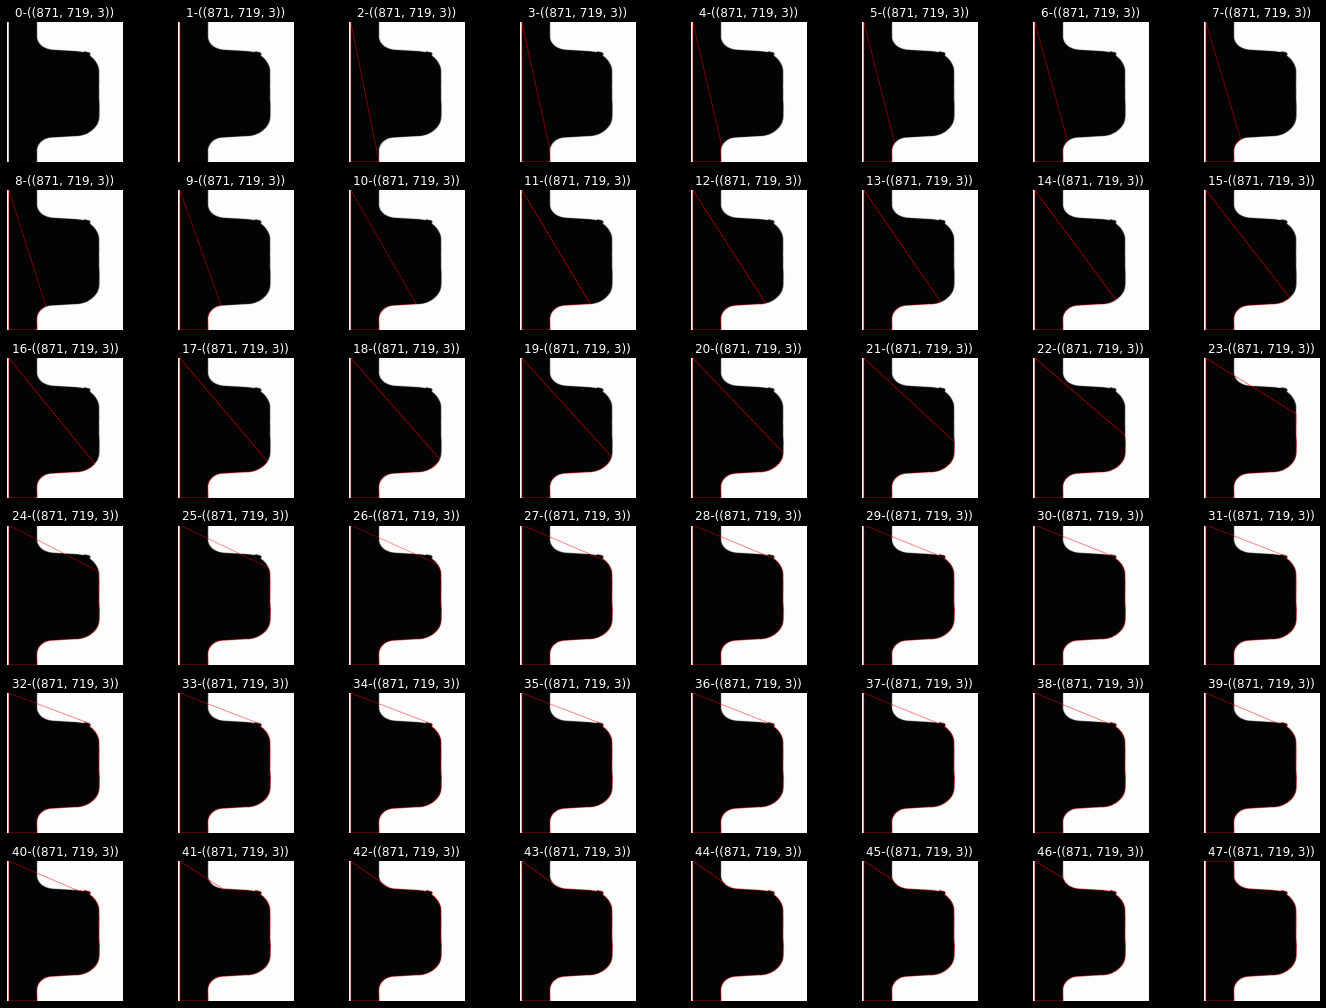

In [62]:
# 逐段绘制轮廓
contour_imgs=[]
gap=1
for iran in range(0,len(copy_contour)):
    render_img3=img.copy()
    draw_contour=copy_contour[0:min(iran+gap,len(copy_contour))]
    # print(draw_contour.flatten())
    render_img3=cv2.drawContours(render_img3,[draw_contour],-1,(255,0,0),2)
    contour_imgs.append(render_img3)
show_images(contour_imgs)

In [64]:
my_contour=copy_contour.reshape(copy_contour.shape[0],-1)
for i in range(len(my_contour)):
    p1=my_contour[i]
    p2=my_contour[(i+1)%len(my_contour)]
    grad=(p1[0]-p2[0])*1.0/(p1[1]-p2[1]+0.000001)
    print(i,p1,p2,grad)

0 [11  0] [ 11 870] -0.0
1 [ 11 870] [186 870] -175000000.0
2 [186 870] [185 794] 0.013157894563711914
3 [185 794] [191 771] -0.2608695538752368
4 [191 771] [202 753] -0.6111110771604957
5 [202 753] [214 741] -0.9999999166666736
6 [214 741] [228 731] -1.399999860000014
7 [228 731] [242 724] -1.999999714285755
8 [242 724] [267 718] -4.166665972222338
9 [267 718] [416 709] -16.555553716049587
10 [416 709] [436 709] -20000000.0
11 [436 709] [463 705] -6.749998312500422
12 [463 705] [488 697] -3.124999609375049
13 [488 697] [514 683] -1.8571427244898056
14 [514 683] [532 669] -1.2857141938775576
15 [532 669] [544 657] -0.9999999166666736
16 [544 657] [555 643] -0.7857142295918408
17 [555 643] [563 629] -0.5714285306122479
18 [563 629] [568 614] -0.3333333111111126
19 [568 614] [572 590] -0.1666666597222225
20 [572 590] [573 521] -0.014492753413148502
21 [573 521] [570 481] 0.07499999812500005
22 [570 481] [571 347] -0.007462686511472489
23 [571 347] [569 289] 0.03448275802615935
24 [569 28

            3             2
-1.349e-06 x + 0.0002448 x + 0.6358 x + 388.5


/home/wushaogui/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if __name__ == '__main__':


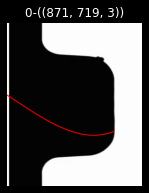

True

In [88]:
# 多项式曲线生成
my_contour=choice_contour.reshape(choice_contour.shape[0],-1)[100:-100,:]
poly = np.poly1d(np.polyfit(my_contour[:,1],my_contour[:,0], 3))
print(poly)

# 绘制拟合曲线
render_img4=img.copy()
for t in range(0, 572, 1):
    y_ = np.int(poly(t))
    cv2.circle(render_img4, (t, y_), 1, (255, 0, 0), 2, 8, 0)
show_images([render_img4])
cv2.imwrite('render_img4.png',render_img4)

### 先提取圆弧，再线性拟合

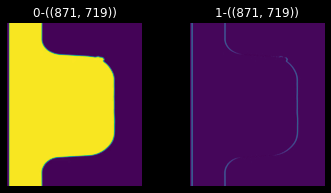

In [98]:
img_gradient_X_64F=cv2.Sobel(gray,cv2.CV_64F,1, 0, 3, 1, 1,cv2.BORDER_DEFAULT)
img_gradient_X_64Fto8U=cv2.convertScaleAbs(img_gradient_X_64F)
show_images([gray,img_gradient_X_64Fto8U])

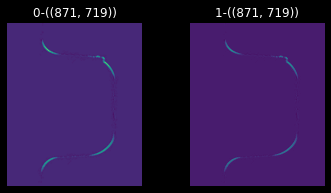

In [120]:
img_gradient_Y_64F=cv2.Sobel(img_gradient_X_64Fto8U,cv2.CV_64F,0, 1, 3, 1, 1,cv2.BORDER_DEFAULT)
img_gradient_Y_64Fto8U=cv2.convertScaleAbs(img_gradient_Y_64F)
show_images([gray,img_gradient_Y_64Fto8U])

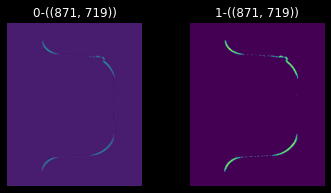

In [140]:
# 二值化
_,binary=cv2.threshold(img_gradient_Y_64Fto8U,8,255,cv2.THRESH_BINARY)
show_images([img_gradient_Y_64Fto8U,binary])

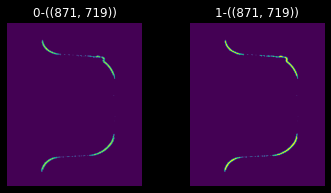

In [141]:
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5))
closeing = cv2.morphologyEx(binary,cv2.MORPH_CLOSE,kernel, iterations =3)
show_images([binary,closeing])

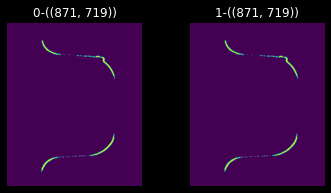

In [142]:
# 去噪声
gray=cv2.bilateralFilter(closeing,5,150,150)
show_images([closeing,gray])

In [144]:
# 寻找轮廓
contours,hierarchy=cv2.findContours(gray,cv2.RETR_CCOMP,cv2.CHAIN_APPROX_SIMPLE)
print(len(contours))

19


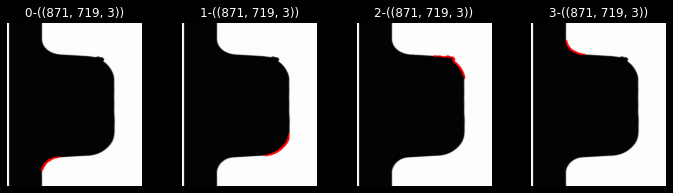

In [150]:
# 显示所有轮廓
allcontours=[]
choice_contour_idxs=[]
for idx in range(len(contours)):
    render_img=img.copy()
    if cv2.contourArea(contours[idx])>200:
        render_img=cv2.drawContours(render_img,[contours[idx]],-1,(255,0,0),-1)
        allcontours.append(render_img)
        choice_contour_idxs.append(idx)
show_images(allcontours,1)

[[417 176]
 [416 177]
 [415 177]
 [414 178]
 [411 178]]


(405, 576)

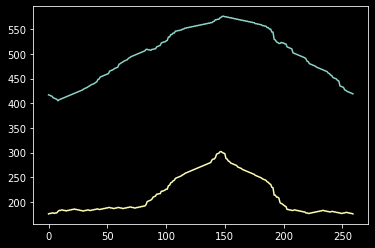

In [164]:
draw_contour=contours[choice_contour_idxs[2]]
draw_contour=draw_contour.reshape(draw_contour.shape[0],-1)
print(draw_contour[:5])
plt.plot([[i,i] for i in range(len(draw_contour))],draw_contour)
min(draw_contour[:,0]),max(draw_contour[:,0])

           3           2
2.424e-05 x - 0.02955 x + 11.97 x - 1426


/home/wushaogui/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if __name__ == '__main__':


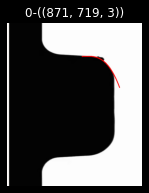

True

In [174]:
# 多项式曲线生成
draw_contour=contours[choice_contour_idxs[2]].reshape(choice_contour_idxs[2].shape[0],-1)
color_contour=draw_contour[:int(len(draw_contour)*0.75),...]
poly = np.poly1d(np.polyfit(color_contour[:,0], color_contour[:,1], 3))
print(poly)

# 绘制拟合曲线
render_img4=img.copy()
for t in range(433, 572, 1):
    y_ = np.int(poly(t))
    cv2.circle(render_img4, (t, y_), 1, (255, 0, 0), 2, 8, 0)
show_images([render_img4])
cv2.imwrite('render_img4.png',render_img4)

## 整合

(895, 838, 4) uint8


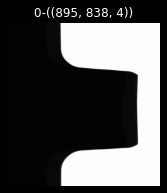

In [248]:
# 读图
img_path='demo3.png'
img=cv2.imread(img_path,-1)
print(img.shape,img.dtype)
show_images([img])

In [249]:
# 去掉最后一个通道
img=img[...,:3]

0 255 121.5989196229745 102.71600911987841


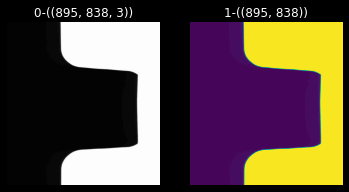

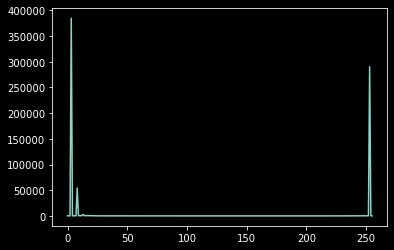

In [250]:
# 先将图片转为灰度图
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
print(np.min(gray),np.max(gray),np.std(gray),np.mean(gray))
show_images([img,gray])
# 查看灰度值分布
histr1 = cv2.calcHist([gray],[0],None,[256],[0,255])
plt.plot([i for i in range(256)],histr1)

0 255 121.5989196229745 152.2839908801216


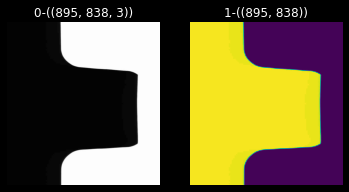

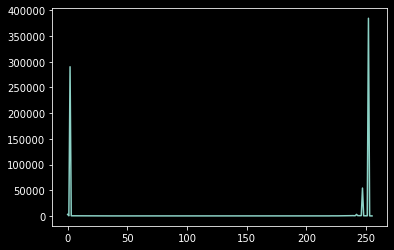

In [251]:
# 目标区域变255，背景变0
gray=255-gray
print(np.min(gray),np.max(gray),np.std(gray),np.mean(gray))
show_images([img,gray])
# 查看灰度值分布
histr1 = cv2.calcHist([gray],[0],None,[256],[0,255])
plt.plot([i for i in range(256)],histr1)

In [252]:
# 去噪声
gray=cv2.bilateralFilter(gray,5,150,150)

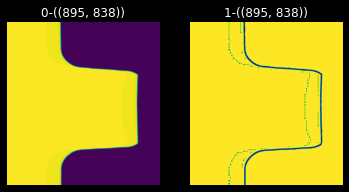

In [253]:
# 二值化
binary=cv2.adaptiveThreshold(gray,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,11,2)
show_images([gray,binary])

In [255]:
# 寻找轮廓
contours,hierarchy=cv2.findContours(binary,cv2.RETR_CCOMP,cv2.CHAIN_APPROX_SIMPLE)
print(len(contours))

70


350


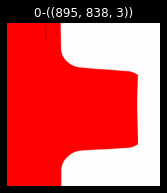

In [256]:
# 查找最大轮廓
contour_erea=[(idx,cv2.contourArea(contours[idx])) for idx in range(len(contours))]
contour_erea=sorted(contour_erea, key=lambda tup: tup[1],reverse=True)

choice_contour_idx=contour_erea[0][0]
print(len(contours[choice_contour_idx]))
render_img1=img.copy()
render_img1=cv2.drawContours(render_img1,[contours[choice_contour_idx]],-1,(255,0,0),-1)
show_images([render_img1])

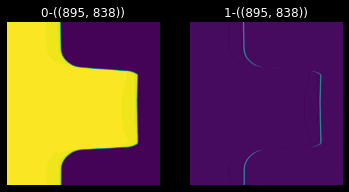

In [257]:
# Y方向的轮廓
img_gradient_X_64F=cv2.Sobel(gray,cv2.CV_64F,1, 0, 3, 1, 1,cv2.BORDER_DEFAULT)
img_gradient_X_64Fto8U=cv2.convertScaleAbs(img_gradient_X_64F)
show_images([gray,img_gradient_X_64Fto8U])

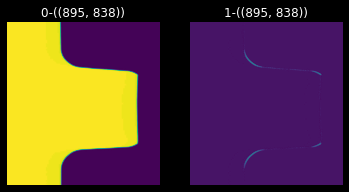

In [258]:
# X方向的轮廓
img_gradient_Y_64F=cv2.Sobel(img_gradient_X_64Fto8U,cv2.CV_64F,0, 1, 3, 1, 1,cv2.BORDER_DEFAULT)
img_gradient_Y_64Fto8U=cv2.convertScaleAbs(img_gradient_Y_64F)
show_images([gray,img_gradient_Y_64Fto8U])

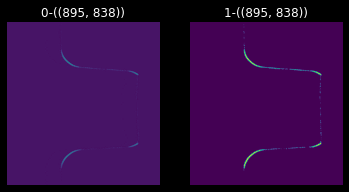

In [259]:
# 二值化
_,binary=cv2.threshold(img_gradient_Y_64Fto8U,8,255,cv2.THRESH_BINARY)
show_images([img_gradient_Y_64Fto8U,binary])

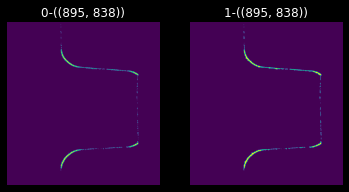

In [260]:
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5))
closeing = cv2.morphologyEx(binary,cv2.MORPH_CLOSE,kernel, iterations =3)
show_images([binary,closeing])

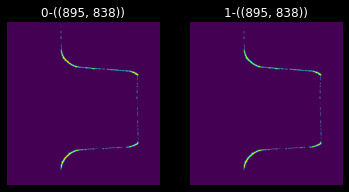

In [261]:
# 去噪声
gray=cv2.bilateralFilter(closeing,5,150,150)
show_images([closeing,gray])

In [262]:
# 寻找轮廓
contours2,hierarchy=cv2.findContours(gray,cv2.RETR_CCOMP,cv2.CHAIN_APPROX_SIMPLE)
print(len(contours2))

29


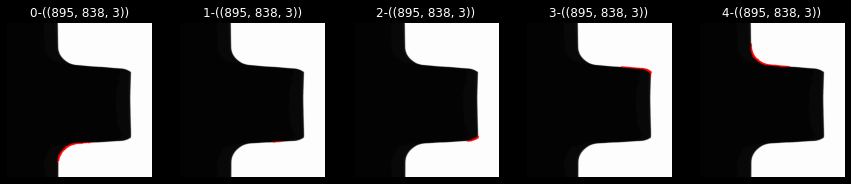

[2, 4, 6, 21, 23]


In [263]:
# 显示所有轮廓
allcontours=[]
choice_contour_idxs=[]
for idx in range(len(contours2)):
    render_img=img.copy()
    if cv2.contourArea(contours2[idx])>200:
        render_img=cv2.drawContours(render_img,[contours2[idx]],-1,(255,0,0),-1)
        allcontours.append(render_img)
        choice_contour_idxs.append(idx)
show_images(allcontours,1)
print(choice_contour_idxs)

In [264]:
# 判断draw_contour的轮廓回环位置
def judge(draw_contour):
    Xmin=max(draw_contour[:,0])
    for i in range(len(draw_contour)):
        if draw_contour[i,0]==Xmin:
            return i
    return -1

In [265]:
draw_contour=contours2[choice_contour_idxs[3]]
draw_contour=draw_contour.reshape(draw_contour.shape[0],-1)
print(len(draw_contour))
choice_idx=judge(draw_contour)
print(choice_idx)
draw_contour[:,0]

194
130


array([545, 543, 547, 554, 555, 568, 569, 570, 571, 572, 573, 574, 575,
       576, 577, 578, 579, 580, 581, 582, 589, 590, 591, 592, 594, 595,
       596, 597, 600, 601, 602, 603, 610, 611, 612, 613, 614, 615, 616,
       618, 619, 622, 623, 626, 627, 628, 629, 632, 633, 634, 635, 636,
       637, 638, 639, 640, 641, 642, 643, 644, 651, 652, 653, 654, 655,
       656, 657, 658, 659, 660, 667, 668, 669, 670, 672, 673, 674, 675,
       676, 677, 678, 679, 680, 681, 682, 683, 684, 684, 686, 687, 688,
       689, 690, 691, 692, 693, 694, 695, 696, 697, 698, 699, 700, 700,
       702, 703, 704, 705, 707, 708, 709, 710, 711, 712, 713, 713, 712,
       712, 711, 711, 715, 717, 716, 716, 717, 717, 718, 718, 720, 720,
       721, 720, 720, 719, 719, 715, 714, 713, 712, 711, 710, 707, 706,
       705, 704, 703, 702, 701, 700, 699, 698, 697, 696, 695, 694, 693,
       688, 687, 684, 683, 681, 680, 676, 675, 668, 667, 658, 657, 656,
       655, 653, 652, 643, 642, 641, 637, 636, 628, 627, 626, 62

278             3           2
-3.936e-05 x + 0.05052 x - 21.6 x + 3778
40            3          2
0.0002301 x - 0.3853 x + 214.9 x - 3.922e+04
99            3          2
8.284e-05 x - 0.1736 x + 120.8 x - 2.725e+04
130            3           2
3.101e-05 x - 0.05695 x + 34.87 x - 6852


/home/wushaogui/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:18: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


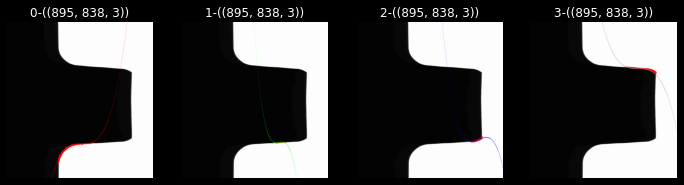

True

In [266]:
# 多项式曲线生成4个圆弧
color_imgs=[]
render_img7=img.copy()
polys=[]
for i in range(4):
    draw_contour=contours2[choice_contour_idxs[i]]
    draw_contour=draw_contour.reshape(draw_contour.shape[0],-1)
    color_contour=draw_contour[:judge(draw_contour),...]
    poly = np.poly1d(np.polyfit(color_contour[:,0], color_contour[:,1], 3))
    print(judge(draw_contour),poly)
    polys.append(poly)
    
    colors=[(255,0,0),(0,255,0),(0,0,255),(150,150,150)]
    # 绘制拟合曲线
    render_img6=img.copy()
    render_img6=cv2.drawContours(render_img6,[contours2[choice_contour_idxs[i]]],-1,(255,0,0),-1)
    for t in range(0, 871, 1):
        y_ = np.int(poly(t))
        cv2.circle(render_img6, (t, y_), 1,colors[i], 1, 8, 0)
        cv2.circle(render_img7, (t, y_), 1,colors[i], 1, 8, 0)
    color_imgs.append(render_img6)
    cv2.imwrite("result-%s.png"%i,render_img6)
show_images(color_imgs,1)
cv2.imwrite("result.png",render_img7)

99
(99, 2)


/home/wushaogui/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


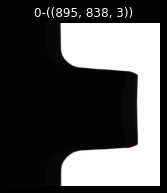

In [267]:
draw_contour=contours2[choice_contour_idxs[2]]
draw_contour=draw_contour.reshape(draw_contour.shape[0],-1)
end_pos=judge(draw_contour)
color_contour=draw_contour[:end_pos,...]
print(len(color_contour))
# color_contour

new_contour=np.array([[t,np.int(polys[2](t))] for t in color_contour[:,0]])
print(new_contour.shape)
render_img8=img.copy()
render_img8=cv2.drawContours(render_img8,[new_contour],-1,(255,0,0),-1)
show_images([render_img8])

(99, 2)


/home/wushaogui/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


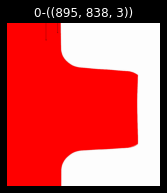

True

In [268]:
new_contour=np.array([[t,np.int(polys[2](t))] for t in color_contour[:,0]])
print(new_contour.shape)
render_img9=render_img1.copy()
render_img9=cv2.drawContours(render_img9,[new_contour],-1,(255,255,255),-1)
show_images([render_img9])
cv2.imwrite('test.png',render_img9)

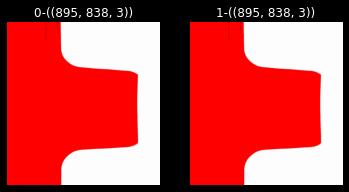

True

In [269]:
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5))
openning = cv2.morphologyEx(render_img9,cv2.MORPH_OPEN,kernel, iterations =3)
show_images([render_img9,openning])
cv2.imwrite('test.png',openning)

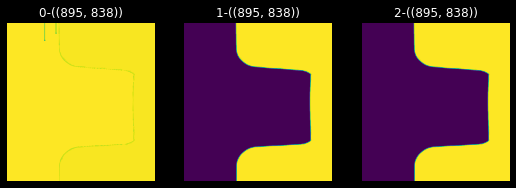

In [270]:
show_images([openning[...,0],openning[...,1],openning[...,2]])

In [271]:
# 寻找轮廓
contours3,hierarchy=cv2.findContours(openning[...,-1],cv2.RETR_CCOMP,cv2.CHAIN_APPROX_SIMPLE)
print(len(contours3))

1


In [272]:
# 显示所有轮廓
allcontours=[]
choice_contour_idxs=[]
zero_img=np.zeros_like(img)
for idx in range(len(contours3)):
    render_img=img.copy()
    area=cv2.contourArea(contours3[idx])
    if area>50 and area<500:
        render_img=cv2.drawContours(render_img,[contours3[idx]],-1,(255,0,0),-1)
        zero_img=cv2.drawContours(zero_img,[contours3[idx]],-1,(255,0,0),-1)
        allcontours.append(render_img)
        choice_contour_idxs.append(idx)
show_images(allcontours,1)
print(choice_contour_idxs)

true_result=cv2.addWeighted(img,1.0,zero_img,0.8,1)
cv2.imwrite('true_result.png',np.hstack([img,true_result[...,::-1]]))

<Figure size 0x216 with 0 Axes>

[]


True

In [205]:
finally_contour=contours[choice_contour_idx]
my_finally_contour=finally_contour.reshape(finally_contour.shape[0],-1)
print(my_finally_contour.shape)
for i in range(len(my_finally_contour)):
    if my_finally_contour[i,0]==417:
        print(i) # 293

(377, 2)
273
292


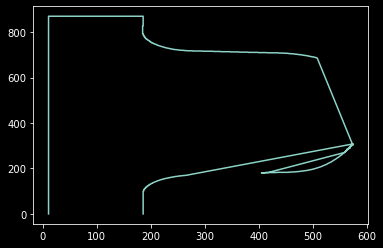

In [210]:
plt.plot(my_finally_contour[:,0],my_finally_contour[:,1])

In [212]:
new_contour[:10]

array([[417, 182],
       [416, 182],
       [415, 182],
       [414, 182],
       [411, 181],
       [410, 181],
       [409, 181],
       [408, 181],
       [405, 181],
       [407, 181]])

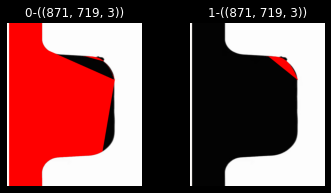

True

In [216]:
my_finally_contour[200:200+len(new_contour),:]=new_contour
render_img9=img.copy()
render_img10=img.copy()
render_img9=cv2.drawContours(render_img9,[my_finally_contour],-1,(255,0,0),-1)
render_img10=cv2.drawContours(render_img10,[new_contour],-1,(255,0,0),-1)
show_images([render_img9,render_img10])
cv2.imwrite('render_img9.png',render_img9)

# 111